In [1]:
import numpy as np
import json
import h5py

[洗牌的PPT](https://www.iacr.org/conferences/asiacrypt2012/program_pdf/Charvillon.pdf)
* 论文作者提出的方案主要是在硬件上实现,软件仿真直接random交换trace中两个兴趣点位置 模拟洗牌

In [2]:
with open('../utils.json', 'r') as f:    
    json_data = json.load(f)
    file_path = json_data['data']['path']

In [3]:
with h5py.File(file_path, 'r') as h5f:
    traces = h5f['traces'][()]
    plaintexts = h5f['plaintext'][()]
    ciphertexts = h5f['ciphertext'][()]
    keys = h5f['keys'][()]

In [4]:
import copy

def shuffling(traces, times):
    shuffling_traces = copy.deepcopy(traces)
    for index, trace in enumerate(shuffling_traces):
        for i in range(times):
            random_nums = np.random.randint(0, len(trace), (2, ))
            temp_point = trace[random_nums[0]]
            trace[random_nums[0]] = trace[random_nums[1]]
            trace[random_nums[1]] = temp_point
        shuffling_traces[index] = trace
    return shuffling_traces

In [5]:
new_traces = shuffling(traces, 1000)

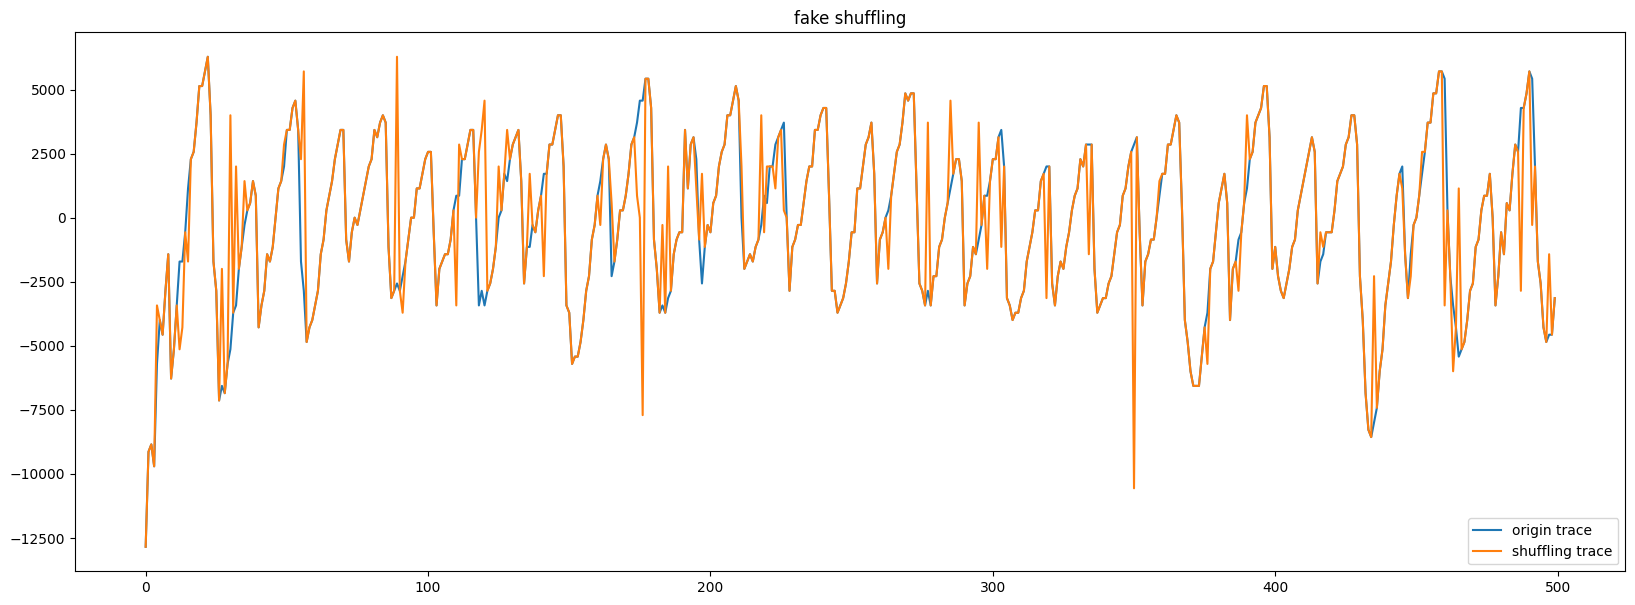

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
x = range(500)
plt.plot(x, traces[0, :500], label='origin trace')
plt.plot(x, new_traces[0, :500], label='shuffling trace')
plt.legend()
plt.title('fake shuffling')
plt.savefig("./shuffling.png")
plt.show()